In [13]:
import pandas as pd
from scipy.stats import stats
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Read in the data set
df = pd.read_csv('data/train.csv', sep=',',keep_default_na=False, na_values='null')
# Display shape of the data
print(df.shape)
print(df)

(13288920, 13)
                id           valid_time  latitude  longitude            tp  \
0                1  2018-01-01 00:00:00      59.0      -8.00  3.814697e-06   
1                2  2018-01-01 00:00:00      59.0      -7.75  1.668930e-05   
2                3  2018-01-01 00:00:00      59.0      -7.50  1.811981e-05   
3                4  2018-01-01 00:00:00      59.0      -7.25  1.907349e-05   
4                5  2018-01-01 00:00:00      59.0      -7.00  1.525879e-05   
...            ...                  ...       ...        ...           ...   
13288915  13288916  2018-12-31 23:00:00      50.0       1.00  1.239777e-05   
13288916  13288917  2018-12-31 23:00:00      50.0       1.25  1.621246e-05   
13288917  13288918  2018-12-31 23:00:00      50.0       1.50  3.814697e-06   
13288918  13288919  2018-12-31 23:00:00      50.0       1.75  1.907349e-06   
13288919  13288920  2018-12-31 23:00:00      50.0       2.00  9.536743e-07   

               u10       v10          sp      u1

In [9]:
X_train = df.drop(columns=['t2m'])  # Features
y_train = df['t2m']  # Labels (y can be true or false)

In [11]:
# Finding attribute characteristics:
def analyze_dataframe(explore_df):
    results = []
    for col in explore_df.columns:
        col_data = explore_df[col]
        dtype = col_data.dtype
        # Get percentage of missing data
        missing = (len(explore_df[explore_df[col] == "unknown"]) / len(explore_df)) * 100
        # Determine the noisiness of results (if there are outliers) (only for numerical)
        if np.issubdtype(dtype, np.number):
            # Find z-score (how far a data point is from the mean)
            z_scores = np.abs(stats.zscore(col_data)) if len(col_data) > 1 else np.array([])
            outliers = np.sum(z_scores > 3)  # Count outliers, we define as z score of more than 3
            noise_type = []
            if outliers > 0:
                # If there are outliers,
                noise_desc = "Outliers"
            else:
                noise_desc = "None"
        else:
            noise_desc = "None"
        # Determining the type of distribution (only for numerical)
        if np.issubdtype(dtype, np.number) and len(col_data) > 1:
            skewness = stats.skew(col_data)
            if np.all(col_data >= 0) and skewness > 1:
                distribution = "Log-normal"
            elif -0.5 < skewness < 0.5:
                distribution = "Gaussian"
            else:
                distribution = "Other"
        else:
            distribution = "Categorical" if explore_df[col].dtype == 'object' else "Uniform"

        results.append([col, str(dtype), f"{missing:.2f}%", noise_desc, distribution])
    return pd.DataFrame(results, columns=["Name", "Type", "% Missing", "Noisiness", "Distribution"])


explore_df = df.copy(deep=True)

analyze_dataframe(explore_df)

/var/folders/7x/9t6kbk7527155j9m2f98pg040000gn/T/ipykernel_25297/1745696632.py:12: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = np.abs(stats.zscore(col_data)) if len(col_data) > 1 else np.array([])
/var/folders/7x/9t6kbk7527155j9m2f98pg040000gn/T/ipykernel_25297/1745696632.py:24: DeprecationWarning: Please import `skew` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  skewness = stats.skew(col_data)
/var/folders/7x/9t6kbk7527155j9m2f98pg040000gn/T/ipykernel_25297/1745696632.py:12: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = np.abs(stats.zscore(col_data)) if len(col_data) > 1 else np.array([])
/var/folders/7x/9t6kbk7527155j9m2f98pg040000gn/T/ipykernel_25297/17456

,Name,Type,% Missing,Noisiness,Distribution
0,id,int64,0.00%,None,Gaussian
1,valid_time,object,0.00%,None,Categorical
2,latitude,float64,0.00%,None,Gaussian
3,longitude,float64,0.00%,None,Gaussian
4,tp,float64,0.00%,Outliers,Log-normal
5,u10,float64,0.00%,Outliers,Gaussian
6,v10,float64,0.00%,Outliers,Gaussian
7,sp,float64,0.00%,Outliers,Other
8,u100,float64,0.00%,Outliers,Gaussian
9,v100,float64,0.00%,Outliers,Gaussian


In [16]:
pd.plotting.scatter_matrix(explore_df, figsize=(15,15))
plt.show()
plt.close()

KeyboardInterrupt: 

In [17]:
explore_df.corr(numeric_only=True)

,id,latitude,longitude,tp,u10,v10,sp,u100,v100,tcc,ptype,t2m
id,1.000000,-1.141136e-04,3.084359e-06,0.020646,0.072310,0.110830,0.103652,0.074792,0.114604,0.014057,-0.167003,0.356714
latitude,-0.000114,1.000000e+00,2.178158e-18,0.024489,-0.005567,0.133112,-0.118997,-0.003451,0.132627,0.056854,0.074319,-0.192024
longitude,0.000003,2.178158e-18,1.000000e+00,-0.070298,-0.033214,-0.033994,0.156200,-0.028453,-0.040022,-0.076165,-0.046142,0.019020
tp,0.020646,2.448939e-02,-7.029830e-02,1.000000,-0.027792,0.154852,-0.216148,-0.025559,0.166691,0.237507,0.139939,-0.031759
u10,0.072310,-5.567233e-03,-3.321351e-02,-0.027792,1.000000,0.011208,-0.042757,0.988070,-0.015877,-0.049808,-0.156899,0.173913
v10,0.110830,1.331121e-01,-3.399388e-02,0.154852,0.011208,1.000000,-0.151017,0.053362,0.989435,0.199292,-0.023864,0.071270
sp,0.103652,-1.189974e-01,1.562004e-01,-0.216148,-0.042757,-0.151017,1.000000,-0.058544,-0.176129,-0.189439,-0.217448,0.246608
u100,0.074792,-3.451025e-03,-2.845290e-02,-0.025559,0.988070,0.053362,-0.058544,1.000000,0.027012,-0.035896,-0.154219,0.169121
v100,0.114604,1.326269e-01,-4.002153e-02,0.166691,-0.015877,0.989435,-0.176129,0.027012,1.000000,0.209839,-0.021807,0.072740
tcc,0.014057,5.685422e-02,-7.616496e-02,0.237507,-0.049808,0.199292,-0.189439,-0.035896,0.209839,1.000000,0.198153,-0.064540


(array([5.193000e+03, 9.510400e+04, 5.028950e+05, 2.203763e+06,
        4.708570e+06, 3.704711e+06, 1.554529e+06, 4.374130e+05,
        7.355800e+04, 3.184000e+03]),
 array([-19.073944, -14.850653, -10.627362,  -6.404071,  -2.18078 ,
          2.042511,   6.265802,  10.489093,  14.712384,  18.935675,
         23.158966]),
 <BarContainer object of 10 artists>)

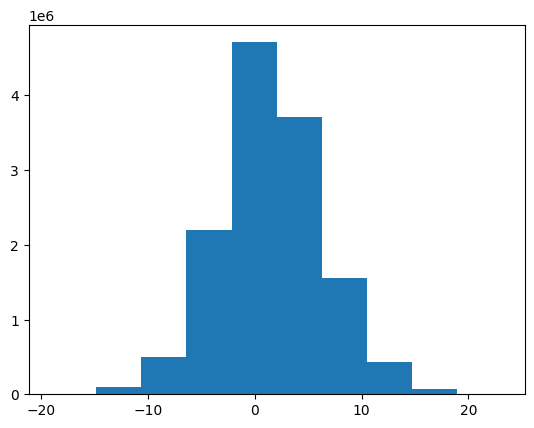

In [66]:
plt.hist(explore_df['v10'])

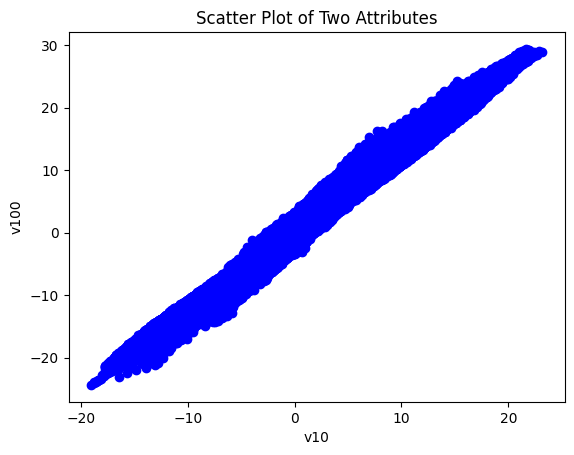

In [19]:
# Scatter plot
plt.scatter(explore_df['v10'], explore_df['v100'], color='blue', marker='o')
plt.xlabel('v10')
plt.ylabel('v100')
plt.title('Scatter Plot of v10 vs.  v100')
plt.show()

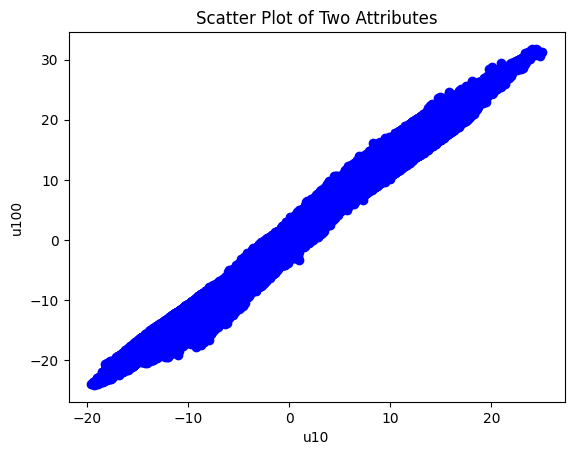

In [23]:
# Scatter plot
plt.scatter(explore_df['u10'], explore_df['u100'], color='blue', marker='o')
plt.xlabel('u10')
plt.ylabel('u100')
plt.title('Scatter Plot of u10 vs. u100')
plt.show()

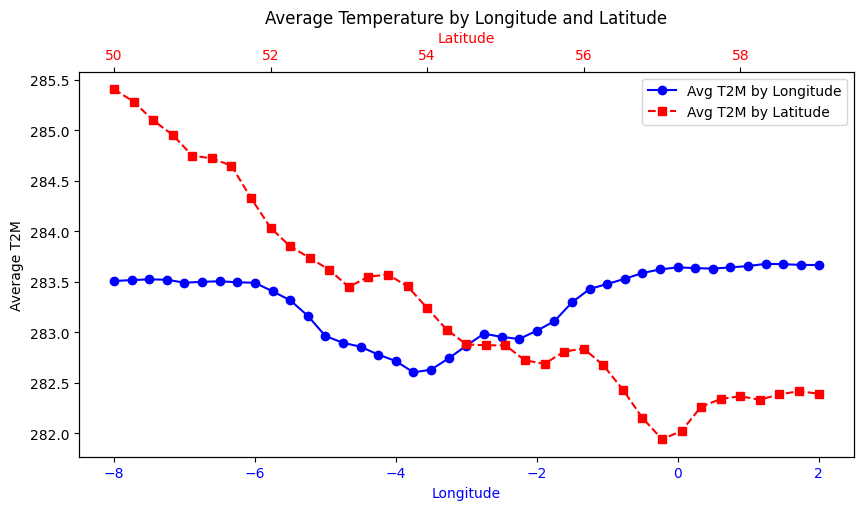

In [34]:
# Group by longitude/latitude
avg_temps_by_longitude = explore_df.groupby('longitude')['t2m'].mean().reset_index()
avg_temps_by_latitude = explore_df.groupby('latitude')['t2m'].mean().reset_index()
avg_temps_by_longitude = avg_temps_by_longitude.sort_values(by='longitude')
avg_temps_by_latitude = avg_temps_by_latitude.sort_values(by='latitude')

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(avg_temps_by_longitude['longitude'], avg_temps_by_longitude['t2m'], marker='o', linestyle='-', color='blue', label='Avg T2M by Longitude')
ax1.set_xlabel('Longitude', color='blue')
ax1.tick_params(axis='x', labelcolor='blue')

# Secondary Axis
ax2 = ax1.twiny()
ax2.plot(avg_temps_by_latitude['latitude'], avg_temps_by_latitude['t2m'], marker='s', linestyle='--', color='red', label='Avg T2M by Latitude')
ax2.set_xlabel('Latitude', color='red')
ax2.tick_params(axis='x', labelcolor='red')

# Labels/Legends
ax1.set_ylabel('Average T2M')
ax1.set_title('Average Temperature by Longitude and Latitude')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

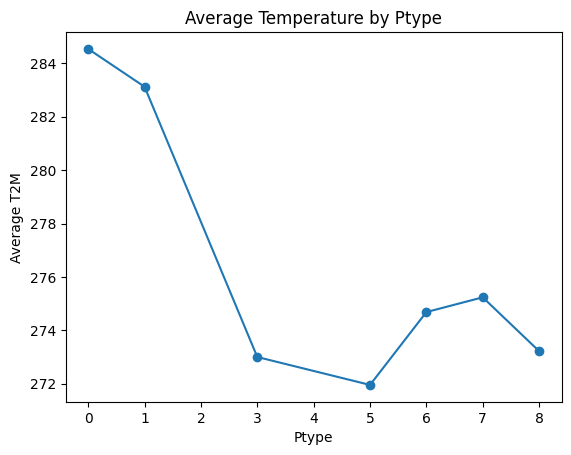

In [38]:
avg_temps_by_ptype = explore_df.groupby('ptype')['t2m'].mean().reset_index()
avg_temps_by_ptype = avg_temps_by_ptype.sort_values(by='ptype')
plt.plot(avg_temps_by_ptype['ptype'], avg_temps_by_ptype['t2m'], marker='o', linestyle='-')

# Labels and title
plt.xlabel('Ptype')
plt.ylabel('Average T2M')
plt.title('Average Temperature by Ptype')

# Show the plot
plt.show()

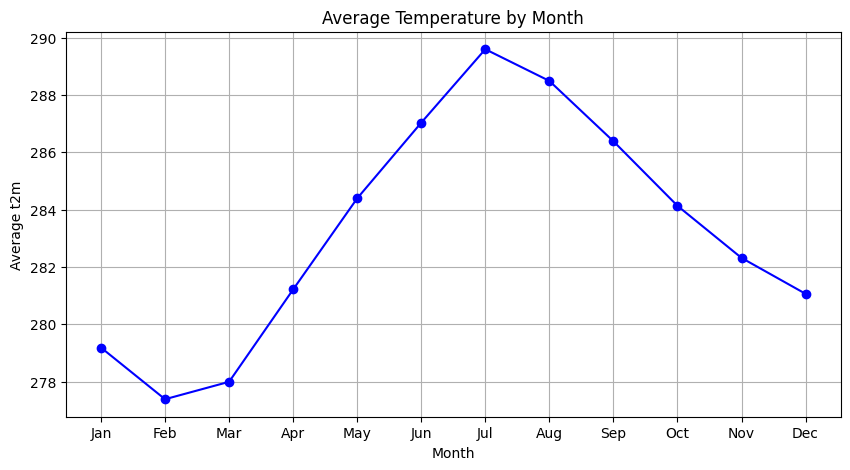

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'valid_time' to datetime format
explore_df['valid_time'] = pd.to_datetime(explore_df['valid_time'])

# Extract month and calculate the average t2m
explore_df['month'] = explore_df['valid_time'].dt.month
monthly_avg_temp = explore_df.groupby('month')['t2m'].mean()

# Plot the monthly average t2m
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Average t2m')
plt.title('Average Temperature by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()


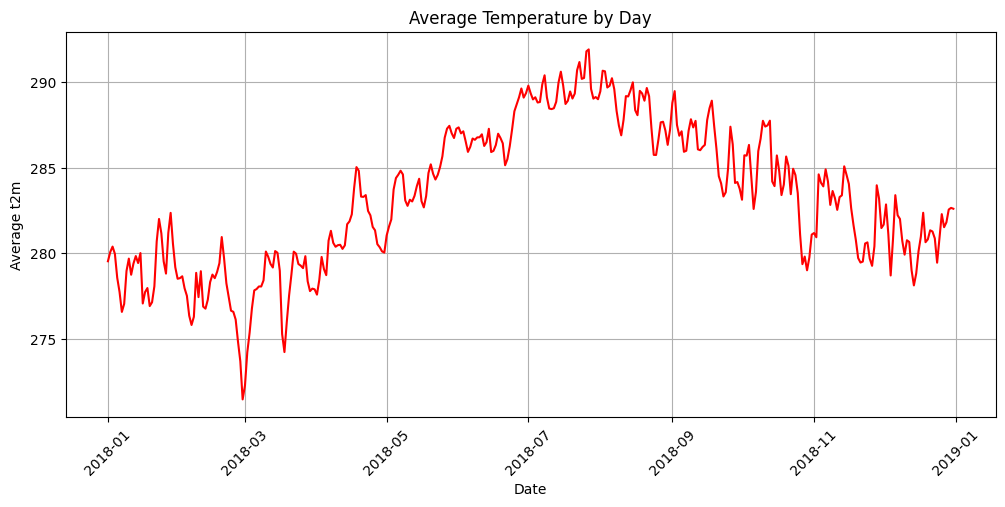

In [45]:
explore_df['date'] = explore_df['valid_time'].dt.date
daily_avg_temp = explore_df.groupby('date')['t2m'].mean()
plt.figure(figsize=(12, 5))
plt.plot(daily_avg_temp.index, daily_avg_temp.values, color='r')
plt.xlabel('Date')
plt.ylabel('Average t2m')
plt.title('Average Temperature by Day')
plt.xticks(rotation=45)
plt.grid()
plt.show()

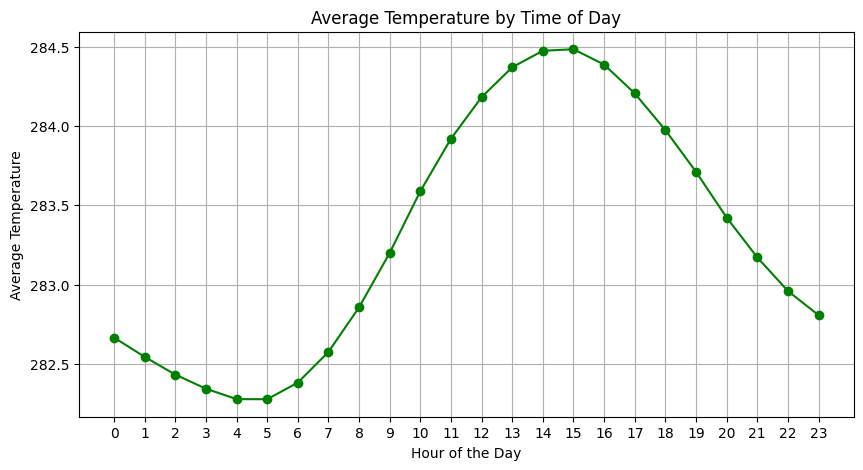

In [48]:
explore_df['valid_time'] = pd.to_datetime(explore_df['valid_time'])
explore_df['hour'] = explore_df['valid_time'].dt.hour
hourly_avg_temp = explore_df.groupby('hour')['t2m'].mean()
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg_temp.index, hourly_avg_temp.values, marker='o', linestyle='-', color='g')
plt.xlabel('Hour of the Day')
plt.ylabel('Average t2m')
plt.title('Average Temperature by Time of Day')
plt.xticks(range(0, 24))  # Show every hour on x-axis
plt.grid()d
plt.show()

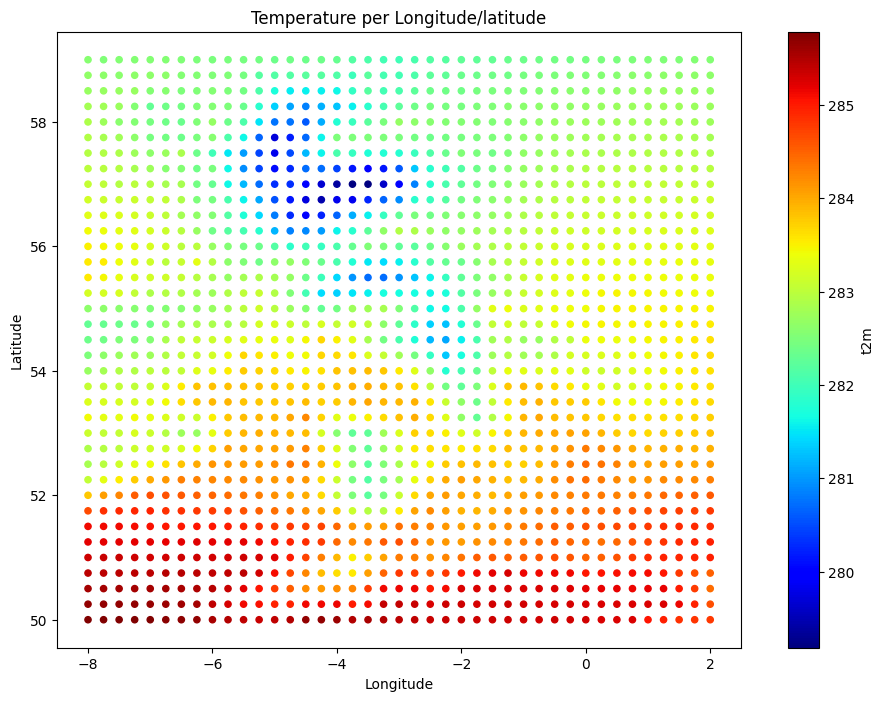

In [64]:
df_max = explore_df.groupby(['longitude', 'latitude'], as_index=False)['t2m'].mean()

# Scatter plot using longitude and latitude as coordinates
map = df_max.plot.scatter(
    x='longitude',
    y='latitude',
    c='t2m',
    cmap='jet',
    colorbar=True,
    figsize=(12, 8),
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Temperature per Longitude/latitude")
map.set_aspect('equal')
plt.show()

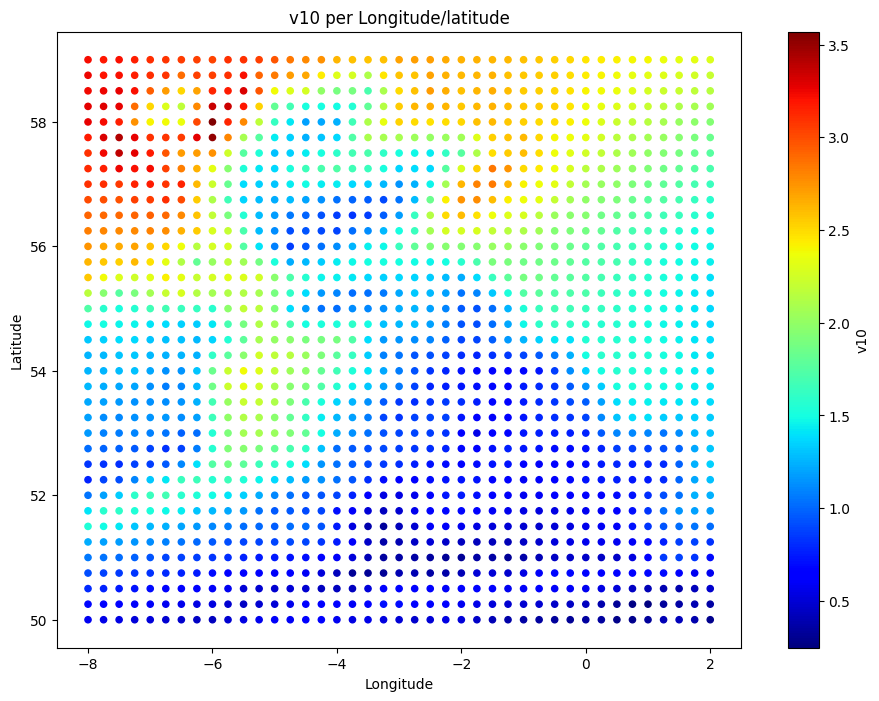

In [65]:
df_max = explore_df.groupby(['longitude', 'latitude'], as_index=False)['v10'].mean()

# Scatter plot using longitude and latitude as coordinates
map = df_max.plot.scatter(
    x='longitude',
    y='latitude',
    c='v10',
    cmap='jet',
    colorbar=True,
    figsize=(12, 8),
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("v10 per Longitude/latitude")
map.set_aspect('equal')
plt.show()